| Variable Name | Variable Description | Variable Type | 
| --- | --- | -- |
| Category | Category of the product ordered | string |
| City | Customer Residence City | string |
| Country | Customer Residence Country | string |
| Customer ID | Unique ID to identify each Customer | string |
| Customer Name | Name of the Customer | string |
| Discount | Discount provided | numeric |
| Order Date | Order Date of the product | date |
| Order ID | Unique Order ID for each Customer | string |
| Order Piority | Low Piority, Medium Piority, High Piority, Critical Piority | string | 
| Product ID | Unique ID of the Product | string |
| Product Name | Name of the Product | string |
| Profit | Profit/Loss incurred | numeric |
| Quantity  | Quantity of the Product | numeric |
| Region | Region where the Customer belong | string |
| Row ID | Unique ID for each row | numeric |
| Sales | Sales of the Product | numeric |
| Segment | The segment where the Customer belongs | string |
| Ship Date | Shipping Date of the Product | date |
| Ship Mode | Standard Class, Second Class, First Class, Same Day| string |
| Shipping.Cost | Shipping Expenses Incurred |numeric |
| State |  | string |
| Sub.Category |  | string |
| Year | Year of Transaction "Derivative from Shipping Date" | numeric |
| Market | Delivery Destination | string |
| weeknum |  | numeric |

*****

**`Datasets used here are available on my Kaggle profile`**

- [Global Superstore Dataset](https://www.kaggle.com/datasets/ronysoliman/global-superstore-dataset)
- [recommendations_df.csv](https://www.kaggle.com/datasets/ronysoliman/recommendation-items-csv/data)


*Kindly make sure you've enough memory space as the datasets are medium size.*

**`Websites I used in my dissertation`**

- [Stackoverflow](https://stackoverflow.com/): to fix the python errors, and check the updates of the used libraries.
- [Association Rule - mlxtend](https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/): Implemented the `Apriori` & `FP-Growth` algorithms using these library. Additionally, it highlights the performance metrics, and simple examples.
- [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
- [Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes)

### Data Exploratory Analysis

**Importing the required libraries that will be used during the analysis**

In [1]:
# Python libraries I'll use
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.naive_bayes import MultinomialNB
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import pairwise_distances
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules
from sklearn.metrics import accuracy_score
import time


#from sklearn.preprocessing import StandardScaler

# python packages I needed to install/update
# pip install "numpy<1.24"
# pip install networkx
# pip install scikit-learn  -U

# so I can check the rows in more details
pd.set_option('display.max_rows', 500)

**This consider the original dataset I'll be working on**

In [2]:
# output the dataset
df = pd.read_csv('https://raw.githubusercontent.com/RonySoliman/Kaggle-Projects/main/superstore.csv',on_bad_lines='skip')

**Understand the dimension of the dataset is important, this dataset is large with many observations, following up with checking the columns types, Types of columns are numerical [int64 or float64] and object [default type of variable].**

In [3]:
# check the number of rows and columns of the original dataset
df.shape

(51290, 27)

In [4]:
# building the info function to check the dtype of each column and check the number of NULL values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        51290 non-null  object 
 1   City            51290 non-null  object 
 2   Country         51290 non-null  object 
 3   Customer.ID     51290 non-null  object 
 4   Customer.Name   51290 non-null  object 
 5   Discount        51290 non-null  float64
 6   Market          51290 non-null  object 
 7   记录数             51290 non-null  int64  
 8   Order.Date      51290 non-null  object 
 9   Order.ID        51290 non-null  object 
 10  Order.Priority  51290 non-null  object 
 11  Product.ID      51290 non-null  object 
 12  Product.Name    51290 non-null  object 
 13  Profit          51290 non-null  float64
 14  Quantity        51290 non-null  int64  
 15  Region          51290 non-null  object 
 16  Row.ID          51290 non-null  int64  
 17  Sales           51290 non-null 

### Data Wrangling

> Includes data cleaning and some feature engineering.

***I need to understand/highlight the data cleaning and feature engineering so I write about in the thesis***

#### How can data cleaning and features engineering help my work?

| Aims | Data Cleaning | Features Engineering | 
| :- | :- | :- |
| Purpose | Handles existing variables and handles data errors | Creates new variables by transforming current variables | 
| Usage Impact | Makes the data consistent | Makes the prediction more feasible |
| Functionality | Increase the accuracy and validity of the data afterwards | interpret in improving the model performance |
| Techniques (for variables) | Renaming, converting data types, manipulating date variable | creating new features, features labeling, one hot encoding, scaling |

In [5]:
#rename the columns
df.columns = ['Category', 'City', 'Country', 'CustomerID', 'CustomerName',
       'Discount', 'Market', '记录数','OrderDate', 'OrderID', 'OrderPriority',
       'ProductID', 'ProductName', 'Profit', 'Quantity', 'Region', 'RowID',
       'Sales', 'Segment', 'ShipDate', 'ShipMode', 'ShippingCost', 'State',
       'SubCategory', 'Year', 'Market2', 'weeknum']

In [6]:
# modify the date columns

#change these columns into dates:
df['OrderDate'] = pd.to_datetime(df['OrderDate'], errors='coerce')
df['ShipDate'] = pd.to_datetime(df['ShipDate'], errors='coerce')

# check the column name, if i exists in columns >> change the column to string then loop on the next 
#change the next columns into strings:
columns = df[['Category','City','Country','CustomerID','CustomerName','Market','OrderID','OrderPriority','Segment',
             'ShipMode','State','SubCategory','Market2','ProductID','ProductName','Region']]
# to iterate over the 'object' column to change into string type
for i in columns:
    df[i] = df[i].astype('string')
    
# create this column for more understanding! might delete it later or the year colu.
df['DaysofOrderPreparation'] = (df['ShipDate'] - df['OrderDate']).dt.days

In [7]:
# create rating column
start, end = 1, 10 #highlight the starting point & the end point
#end = 10 #highlight 
width = end - start  #here we identify the scale between the starting point and end point
rating = round((df['Quantity'] - df['Quantity'].min())/(df['Quantity'].max() - df['Quantity'].min()) * width + start).astype(int)
df['Rating'] = rating #merge the new column into the original dataset

**This step is important to identify:**


| Variable Name | Reason to Drop this column |
| :- | :- |
| Customer Name | for privacy reasons I don't need to include users names into this analysis |
| Order Date & Ship Date | I've created a new column with the differences between the two dates, the new column is numeric |
| Country & City & State | instead of using this column I've used the market column, because it's easier for feature engineering |
| Product ID | I've used the product name instead |
| Region | Used Market column as it's well-exaplinaed |
| Quantity | Converted to the Rating column |
| Order ID | Wasn't necessary for the Apriori model or ML model |
| Row ID | Each row has unique value, I've used the index instead |

In [8]:
#drop unnecessary columns 
df.drop(['City','Country','OrderDate','ShipDate','weeknum','Market2','ProductID','Region',
         'State','Quantity','OrderID','Category','SubCategory','CustomerName','记录数','RowID'],axis=1,inplace = True)

#modify the customerID to more manageable structure
df['CustomerID'] = df['CustomerID'].str.replace('-','') #done hope this works!

### Feature Engineering

In [9]:
# One hot encoding:
df = pd.get_dummies(df, columns=['Market'])

#label encoding
df['OrderPriority'] = df['OrderPriority'].replace(['Critical','High','Medium','Low'],['1','2','3','4']).astype(int)
df['Segment'] = df['Segment'].replace(['Consumer','Corporate','Home Office'],['0','1','2']).astype(int)
df['ShipMode'] = df['ShipMode'].replace(['Standard Class','First Class','Second Class','Same Day'],['0','1','2','3']).astype(int)

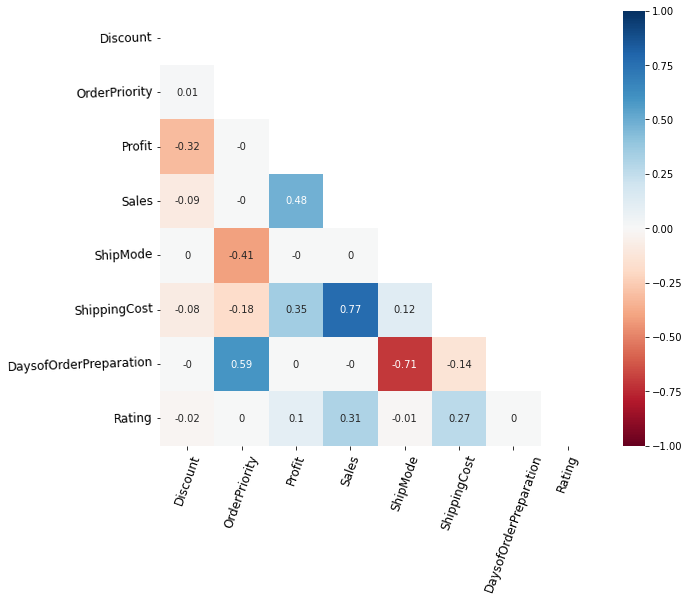

In [10]:
# Plot masked heatmap
df_hm = df[['Discount','OrderPriority','Profit','Sales','ShipMode','ShippingCost',
            'DaysofOrderPreparation','Rating']]
matrix = df_hm.corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
plt.figure(figsize=(10,8))
sns.heatmap(matrix, vmin =-1, vmax=1, cmap='RdBu', square=True, annot=True, mask=mask)
plt.xticks(fontsize=12,rotation=70)
plt.yticks(fontsize=12,rotation=2)
plt.show()

**Heatmap Interpretation**

- For these variables, this nice heatmap helps to identify the correlation strength between variables. For the primary variable I'm interested in as I'll be using accessively in the `Association Rules Mining` is `Rating`, we see it has good correlation with `Sales` and `Shipping Cost`. 

- Negative correlation reflects the high percentage os `Profit` implies from items with low `Discounts` applied.

In [11]:
# create a duplicate of the original dataset in case I need to extract original values
original_df = df

    Ending of the Data Analysis and beginning of building the models...

*****


<h6 style="background-color:#f9f1fe; color:#000; font-size:18px; padding:20px; text-align:center; border-radius:15px; font-family:'Verdana', sans-serif;"> Apriori </h6>
    

In [12]:
#selecting [CustomerID, ProductName, Rating]
apriori = df.pivot_table(index='CustomerID',columns='ProductName',values='Rating')

#replace the values with 0 for easy prediction later on
apriori.fillna(0,inplace = True)

> Rating column has multiple values more than one, building rating matrix requires to set items user hasn't rated with "0" value and items user rated them with "1". 

> Then, we want to recommend items with respect to the support threshold, confidence as known as accuracy of the model and lift metric.

In [13]:
#convert the values into zeros & ones. 
def rating_matrix_apriori(item_freq):
    res = 0
    if item_freq > 0:
        res = 1
    return res
#executing the function
basket_input_apriori = apriori.applymap(rating_matrix_apriori)

In [14]:
# importing association rules libraries 
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# recalling the apriori algorithm with its performance metrics
frequent_itemsets_apriori = apriori(basket_input_apriori, min_support=0.001,use_colnames=True,low_memory=True)
rules_apriori = association_rules(frequent_itemsets_apriori, metric="lift")
rules_apriori.head(5)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(Ibico Index Tab, Clear)","(Acco Hole Reinforcements, Durable)",0.017033,0.007388,0.001026,0.060241,8.154284,0.000900,1.056241
1,"(Acco Hole Reinforcements, Durable)","(Ibico Index Tab, Clear)",0.007388,0.017033,0.001026,0.138889,8.154284,0.000900,1.141510
2,(Staples),"(Acco Pressboard Covers with Storage Hooks, 14...",0.038785,0.001642,0.001026,0.026455,16.114418,0.000962,1.025488
3,"(Acco Pressboard Covers with Storage Hooks, 14...",(Staples),0.001642,0.038785,0.001026,0.625000,16.114418,0.000962,2.563240
4,"(Ibico Index Tab, Clear)","(Advantus Paper Clips, Assorted Sizes)",0.017033,0.009645,0.001026,0.060241,6.245834,0.000862,1.053839


**Apriori Interpretation**

> The previous table reflects the Apriori itemsets results, associated with the performance metrics and here's the breakdown of the table:

| $\normalsize{Apriori Parameters}$ | $\normalsize{Definition}$ |
| :- | :- |
| **antecedents** | represents the item user bought|
| **consequents** | represents the item will recommend to the user |
| **antecedent support** | measures the frequency of antecedent in the dataframe, it's calculated as $\\\Large\frac{Antecedent Frequency}{No. of Transactions}$|
| **consequent support** | measures the frequency of consequent in the dataframe, it's calculated as $\\\Large\frac{Consequent Frequency}{No. of Transactions}$|
| **support** | reflects the transaction where both items are bough together, this metric is calculated as $\\\Large\frac{(Antecedent \& Consequent) Frequency}{No. of Transactions}$|
| **confidence** | reflects how often antecedents \& consequent occur together, it's calculated as $\\\Large\frac{Support}{Antecedent Support}$|
| **lift** | reflects the strength of itemset, it's calculated as $\\\Large\frac{Support}{Antecedent Support * Consequent Support}$ |
| **leverage** | reflects the the difference between the frequency Anecedent \& Consequent shows together and the expected frequency if Anecedent & Consequent were independent, it's calculated as $\\\normalsize{Support}-{(Antecedent Support * Consequent Support)}$| 
| **conviction** | relects the comparison when Anecedent appear with Consequent to the occurance when the rule can be incorrect, a baseline for this metric if the value > 1, it indicates that the rule has strong prediction strnegth, it's calculated as $\\\Large\frac{1 - Consequent Support}{1 - Support}$|

**"Staples" value has large redundency in the Apriori model, it's safe to recommend it existing/or new users, since the users keep buying this item over and over again. But still we're searching for unique bonds between items. So in the next code cells, we try to exclude the "Staples" value and do the analysis one more time.**

In [15]:
# I'll try to remove the staples item as it's included in all itemsets and try to find unique itemsets.
df_without_staples = df[df['ProductName'] != 'Staples']

In [16]:
#here I've excluded the "Staples" item from the Apriori results.
apriori_without_staples = df_without_staples.pivot_table(index='CustomerID',columns='ProductName',values='Rating')
apriori_without_staples.fillna(0,inplace = True)

In [17]:
#replace values >= 1, with "True", and 0 values with False 

def rating_matrix_apriori_without_staples(item_freq):
    res = 0
    if item_freq > 0:
        res = 1
    return res
    
basket_input_without_staples = apriori_without_staples.applymap(rating_matrix_apriori_without_staples)

In [18]:
# Display the updated Apriori model without the "Staples" item

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# using apriori function to do the magic
frequent_itemsets_without_staples = apriori(basket_input_without_staples, min_support=0.001,use_colnames=True,low_memory=True)

# check the results
rules_without_staples = association_rules(frequent_itemsets_without_staples, metric="lift")

### `Visulaization part`


The goal of creating these visualizations is to get sense of the data. I need to understand the performance metrics for Apaiori Algorithm. As I've stated eariler I display the equations of support, confidence, life metrics, etc. 

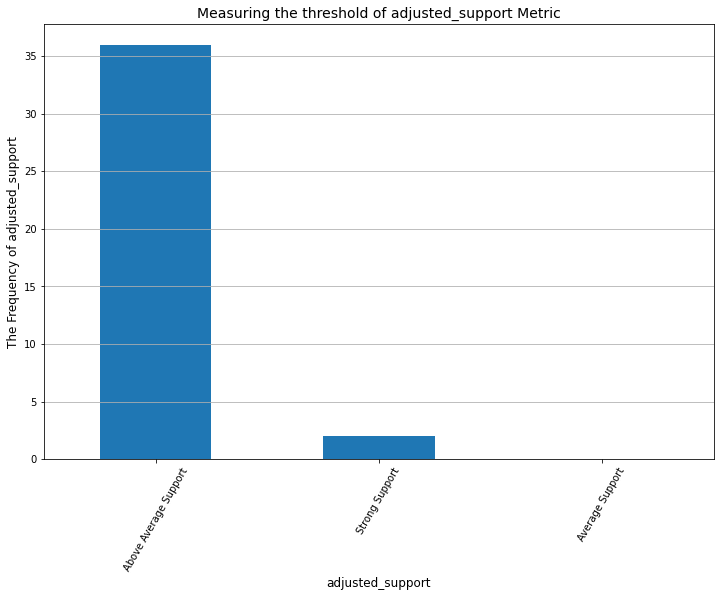

In [19]:
#import the matplotlib library:
import matplotlib.pyplot as plt

#create the cut function:
bins = [0, 0.001, 0.0013, 0.0015]
labels = ["Average Support","Above Average Support","Strong Support"]
rules_without_staples['adjusted_support'] = pd.cut(rules_without_staples["support"], bins=bins, labels=labels)

#create meaning explorations:
def bar_plot(arg):
    plt.figure(figsize=(12,8))
    arg.value_counts().plot.bar()
    plt.title(f"Measuring the threshold of {arg.name} Metric",fontsize=14)
    plt.xlabel(f"{arg.name}",fontsize=12)
    plt.ylabel(f"The Frequency of {arg.name}",fontsize=12)
    plt.xticks(rotation=60)
    plt.grid(axis='y')
    plt.show()

# plot the support ratio threshold based on simple criteria 
# [average support % - above average support % - strong support %]
bar_plot(rules_without_staples['adjusted_support'])

**`Bar Plot Interpretation:`**

- Support Threshold highlighted in the Apriori algorithm is `0.1%`. This is an adicator of the baseline.
- Support Threshold is not the same for each dataset, it depends consistently on the product name length, the smaller the words to be predicted the higher support threshold can go and vice versa.
- In the previous bar plot, I've created using `cut()` to ordeal outputs.

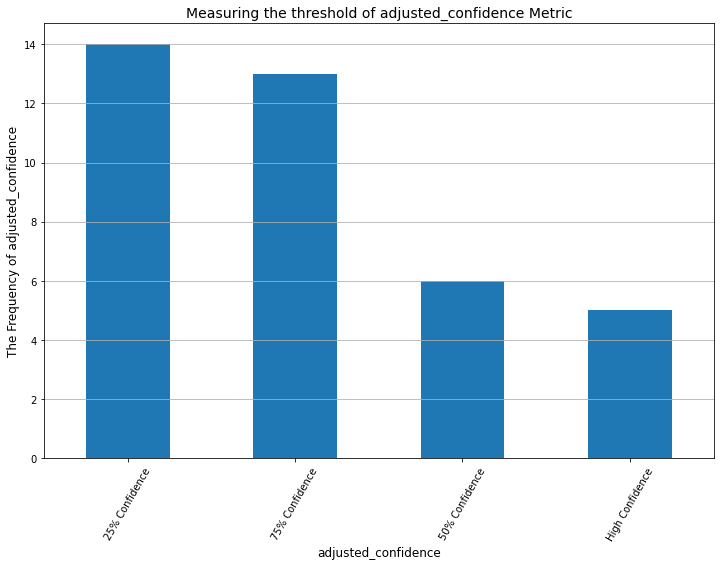

In [20]:
#create the cut function: 
# Here I've applied the quantile aspect for equality measurement

bins = [0, 0.07, 0.09, 0.15, 0.28]
labels = ["25% Confidence","50% Confidence","75% Confidence","High Confidence"]
rules_without_staples['adjusted_confidence'] = pd.cut(rules_without_staples["confidence"], bins=bins, labels=labels)

bar_plot(rules_without_staples['adjusted_confidence'])

**`Bar Plot Interpretation:`**

- For the adjusted confidence, the x-axis reflects the range in order, the confidence threshold is `up to 28%` and the reason for that is some items in the `Product Name` has length more than 10 words in one cell.
- Additionally, we see the confidence interval is distributed in a blanced way.
- That reflects that there're some itemsets with strong bonds.

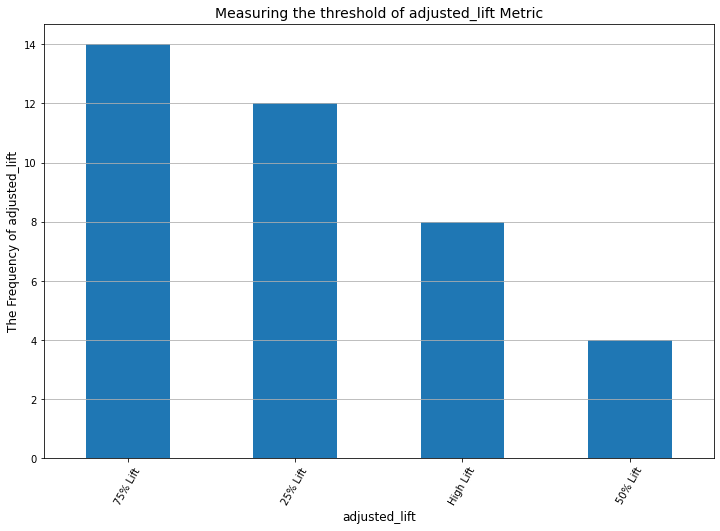

In [21]:
## lift ratio
bins = [0, 7, 8, 11, 34]
labels = ["25% Lift","50% Lift","75% Lift","High Lift"]
rules_without_staples['adjusted_lift'] = pd.cut(rules_without_staples["lift"], bins=bins, labels=labels)

bar_plot(rules_without_staples['adjusted_lift'])

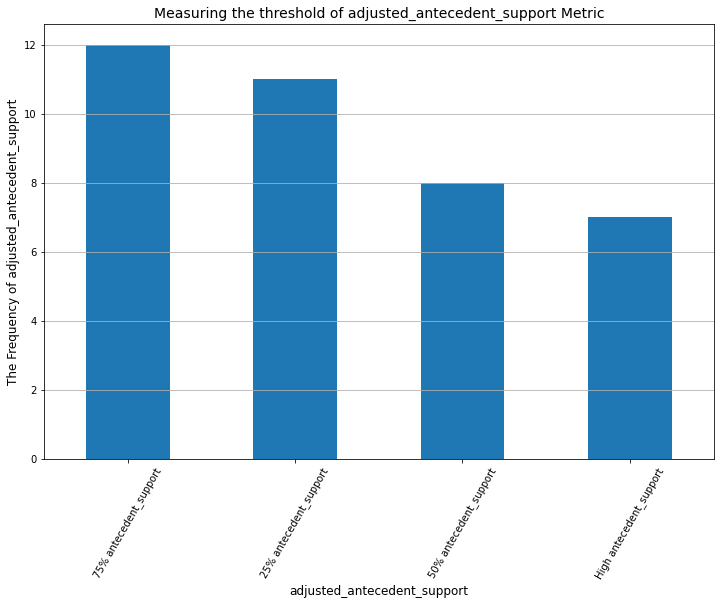

In [22]:
## antecedent_support ratio
bins = [0, 0.008, 0.014, 0.017, 0.02]
labels = ["25% antecedent_support","50% antecedent_support","75% antecedent_support","High antecedent_support"]
rules_without_staples['adjusted_antecedent_support'] = pd.cut(rules_without_staples["antecedent support"], bins=bins, labels=labels)

bar_plot(rules_without_staples['adjusted_antecedent_support'])

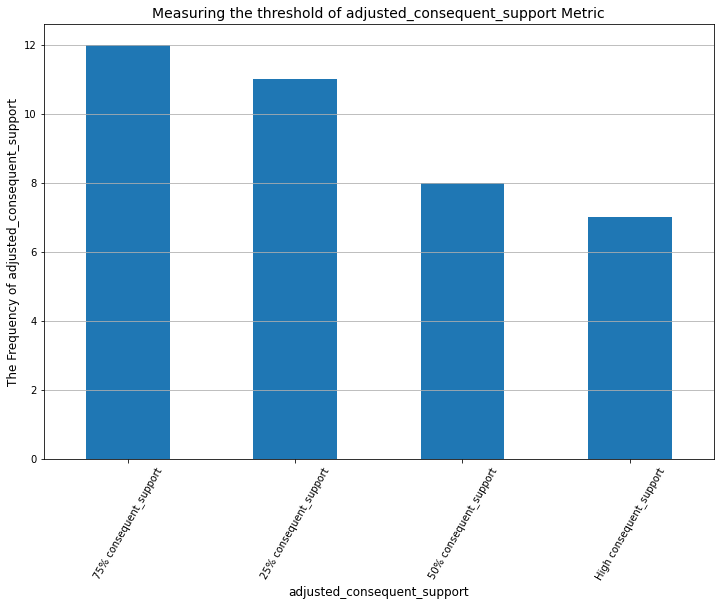

In [23]:
## antecedent_support ratio
bins = [0, 0.008, 0.014, 0.017, 0.02]
labels = ["25% consequent_support","50% consequent_support","75% consequent_support","High consequent_support"]
rules_without_staples['adjusted_consequent_support'] = pd.cut(rules_without_staples["consequent support"], bins=bins, labels=labels)

bar_plot(rules_without_staples['adjusted_consequent_support'])

### Practicing Network Diagram connecting antecedents & consequents:

- Setting 15 Rules then starting to draw straight lines between each rule between antecedents & consequents.

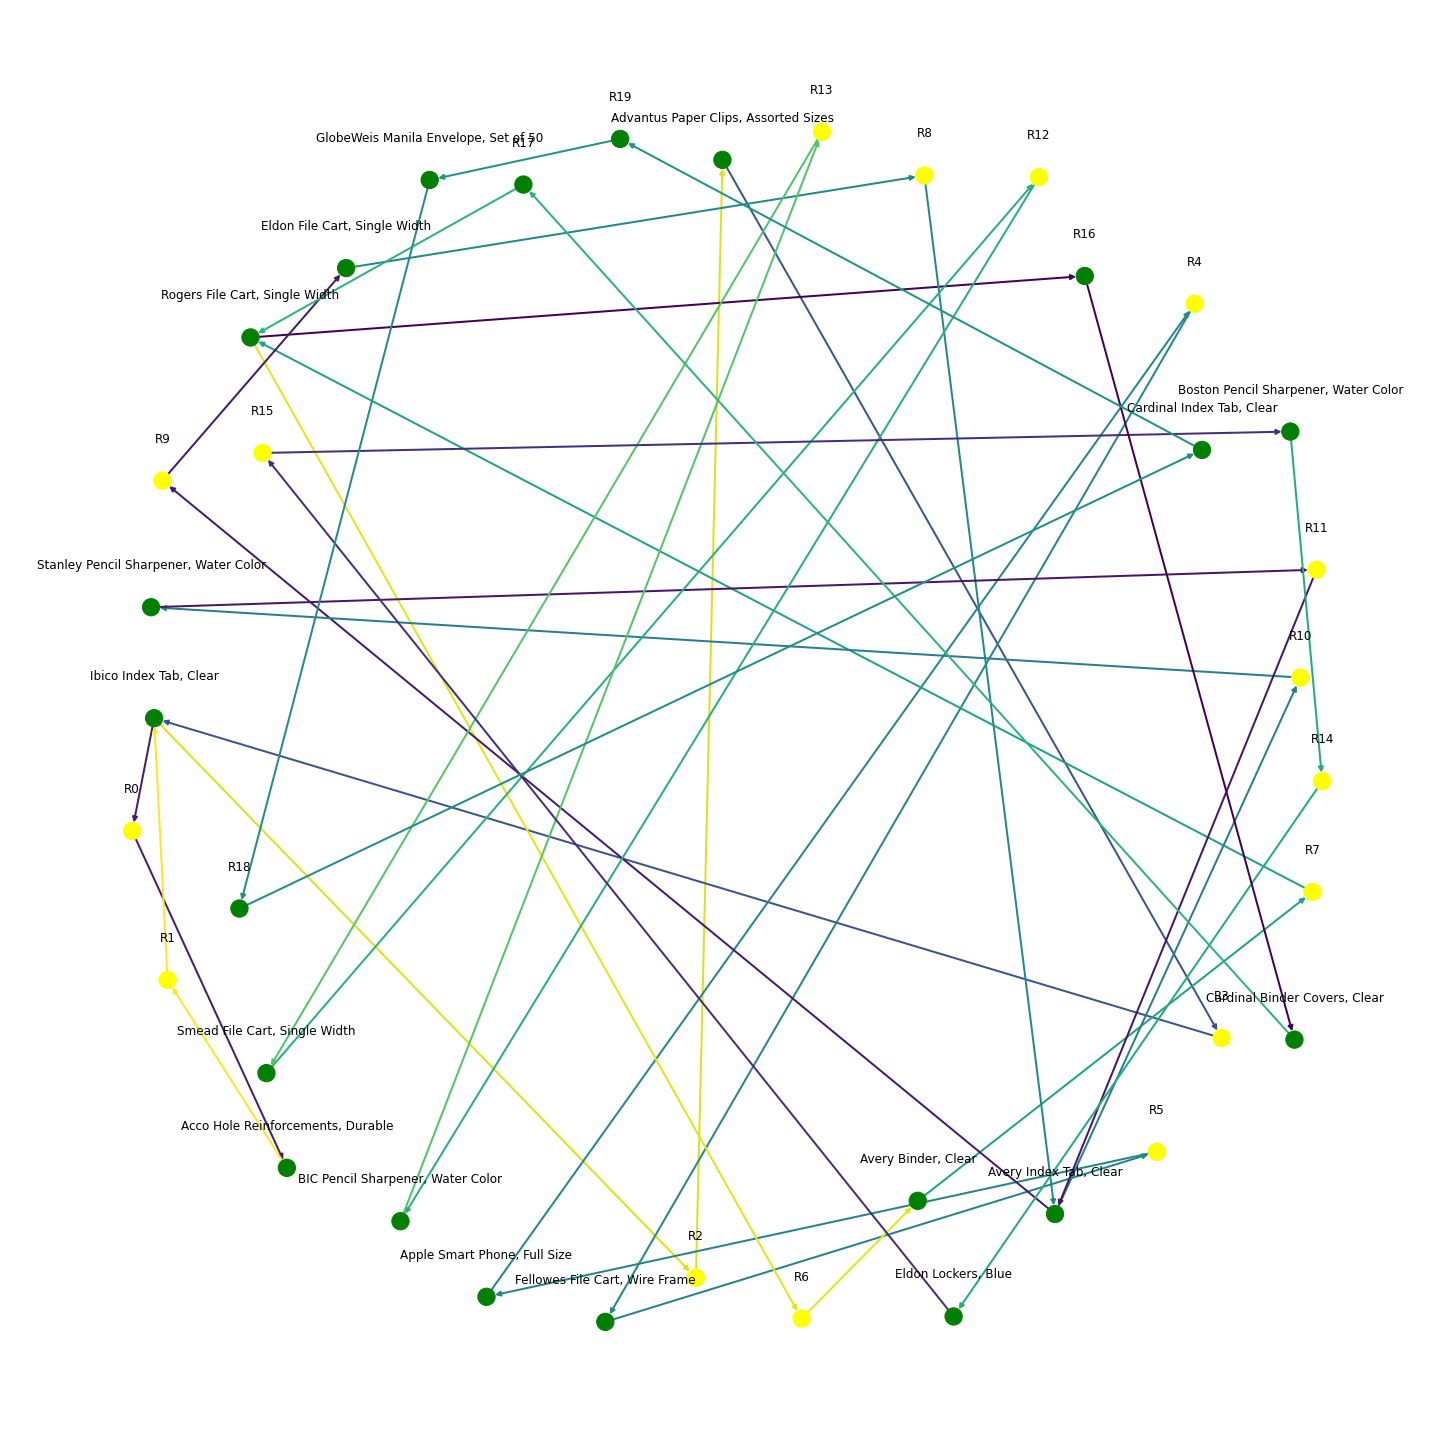

In [24]:
# I'll use this dataframe [frequent_itemsets_without_staples] & [rules_without_staples]
import networkx as nx  

'''a function to build a network diagram connecting antecedents and consequents'''

def draw_graph(rules, rules_to_show):
    import networkx as nx  

    G1 = nx.DiGraph()
   
    color_map=[]
    N = 50
    colors = np.random.rand(N)    
    strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11','R12','R13','R14','R15']   

    for i in range(rules_to_show):
        G1.add_nodes_from(["R"+str(i)])
    
     
        for a in rules.iloc[i]['antecedents']:
            G1.add_nodes_from([a])
            G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)
       
        for c in rules.iloc[i]['consequents']:
            G1.add_nodes_from([a])
            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)
    for node in G1:
        found_a_string = False
        for item in strs:
            if node==item:
                found_a_string = True
        if found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')       
 
 
   
    edges = G1.edges()
    colors = [G1[u][v]['color'] for u,v in edges]
    weights = [G1[u][v]['weight'] for u,v in edges]
    plt.figure(figsize = (20,20))
    pos = nx.spring_layout(G1, k=16, scale=1)
    nx.draw(G1, pos, node_color = color_map, edge_color=colors, width=weights, font_size=13, with_labels=False)            
   # edges=edges,
    for p in pos:  # raise text positions
        pos[p][1] += 0.07
    nx.draw_networkx_labels(G1, pos)
    plt.show()

#Calling function with 10 rules
draw_graph(rules_without_staples, 20)

### Building heatmap for the Apriori Algorithm

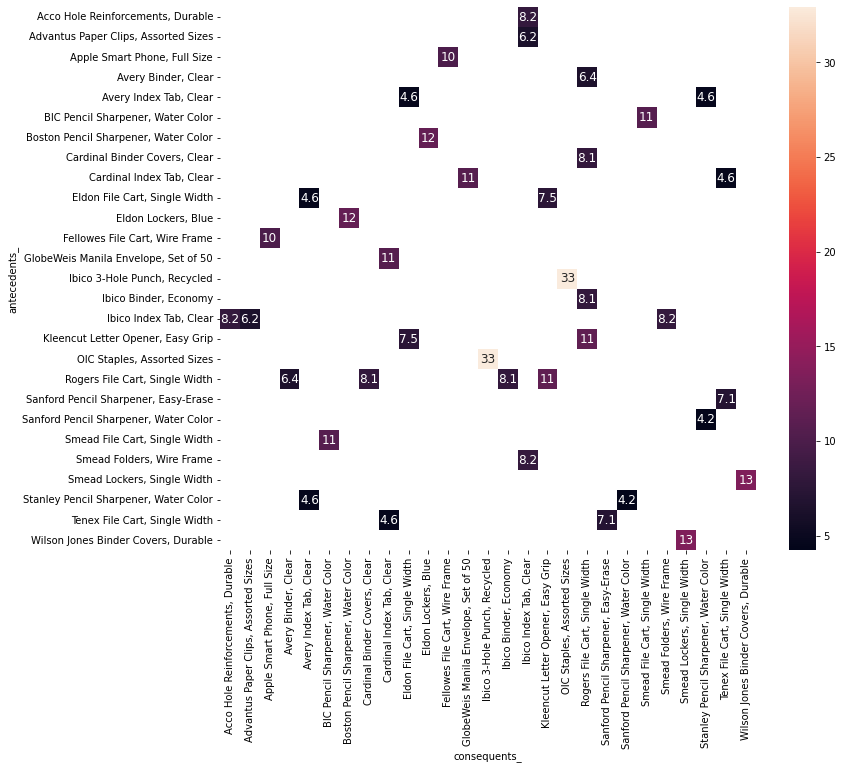

In [25]:
rules_without_staples['lhs items'] = rules_without_staples['antecedents'].apply(lambda x:len(x) )
rules_without_staples[rules_without_staples['lhs items']>0.01].sort_values('lift', ascending=False).head()


# Replace frozen sets with strings
rules_without_staples['antecedents_'] = rules_without_staples['antecedents'].apply(lambda a: ','.join(list(a)))
rules_without_staples['consequents_'] = rules_without_staples['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules_without_staples[rules_without_staples['lhs items']>0.01].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')


# Replace frozen sets with strings
rules_without_staples['antecedents_'] = rules_without_staples['antecedents'].apply(lambda a: ','.join(list(a)))
rules_without_staples['consequents_'] = rules_without_staples['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules_without_staples[rules_without_staples['lhs items']>0.01].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')

import seaborn as sns
# Generate a heatmap with annotations on and the colorbar off

plt.figure(figsize=(12,10))
sns.heatmap(pivot, annot = True,annot_kws={"fontsize":12})
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

**In the next section, the aim is to create a new sub dataframe with the next features:**

| Customer ID | Product Name "Antecedent" | Recommendations "Consequent" |
| :- | :- | :- |
| Retrieved from the original dataset | Items user bought | Apriori items recommendations |

In [26]:
antecedents_ = [] # empty list so I can apply append() function later on
consequents_ = [] # empty list so I can apply append() function later on
values = [] #empty list to store antecedent & consequent pairs values

for i in pivot: #pivot is generated from the heatmap caculations
    g = pivot.loc[pivot[i].isnull() == False,i] #exclude null values from the analysis
    df1 = g.to_frame().transpose() # reshape the dataframe
    if len(np.round(g.values, 6))>1: #round the series to 6 digits and check it's more than 1 value
        for j in g.index: #if there is more than 1 value, then append to empty lists
            antecedents_.append(i)
            consequents_.append(j)
        for l in np.round(g.values, 6):
            values.append(l)
    else: # if there is only one value available then:
        antecedents_.append(i)
        consequents_.append(g.index[0])
        values.append(np.round(g.values, 6)[0])

In [27]:
# using the results highlighted in the previous for loop to build-up the dataframe
test_df = pd.DataFrame(columns=['antecedents_', 'consequents_', 'values'])

#identifying the columns
test_df['antecedents_'] = antecedents_
test_df['consequents_'] = consequents_
test_df['values'] = values
test_df['first_recommendation'] = ['Staples' for i in range(len(test_df))] #Staples exist to all items!!

#check the final results:
#test_df

In [28]:
#create a sub-set with name "temp" just to extract the values and store them into dataframe called "new_grouping"
temp = test_df[["antecedents_", "consequents_"]]
#temp

In [29]:
new_grouping = pd.DataFrame({"antecedents_": temp.antecedents_.unique().tolist(), "consequents_": temp.groupby('antecedents_', as_index=False).apply(lambda x: x['consequents_'].unique())})
new_grouping["first_recommendation"] = ["Staples" for i in range(len(new_grouping))]


In [30]:
#converting the values in antecedent under new name to a list for easy debugging, and iterating over for-loop
antecedents_products = new_grouping.antecedents_.tolist()
antecedents_products

#renaming the columns in the new dataframe
new_dataFrame = pd.DataFrame(columns = ["customerId", "antecedents_", "consequents_", "first_recommendation"])

**The final goal from these steps is the ability to extract the consequent values generated from the Apriori algorithms then merge it with the product name and customer Id. So we can have the user ID, the product he bought, and our final recs. Since Apriori algorithm handles values in lsists and series, data manipulation and iterating over these lists are important**


Data Manipulation in more details:

>    1. Create a for-loop to iterate over each row if df "original dataset"
>    2. Check if product Name "in the Anecedents list that's generated from the Apriori algorithm.
>    3. when if statement is True, then append the values [customerid, antecedents, consequents, first recommendation "Staples"]
>    4. When if statement is False, then append the values [customerid, consequents, first recommendation "Staples"], and leave antecedents empty.
>    5. Finally create the new dataframe with the updated values

In [31]:
#mepty lists are important to store the values extracted from the data manipulation
customerIdList = [] 
antecedents_List = []
consequents_List = []
first_recommendationList = []

#we work on the original dataframe hand-in-hand with apriori results.
for i in range(len(df)): #loop through each row in the df
    if df.ProductName[i] in antecedents_products:
        index = antecedents_products.index(df.ProductName[i])
        customerIdList.append(df.CustomerID[i])
        antecedents_List.append(new_grouping.iloc[index].antecedents_)
        consequents_List.append(new_grouping.iloc[index].consequents_.tolist())
        first_recommendationList.append(new_grouping.iloc[index].first_recommendation)
    else: #in case the product isn't in "antecedents" then 
        customerIdList.append(df.CustomerID[i])
        antecedents_List.append(df.ProductName[i])
        consequents_List.append("")
        first_recommendationList.append("Staples")

#creating a new dataframe and fill it with values
new_dataFrame["customerId"] = customerIdList
new_dataFrame["antecedents_"] = antecedents_List #items user bought which is equal to ProductName from the original dataset
new_dataFrame["consequents_"] = consequents_List #items based on Apriori algorithm, it reflects the itemsets pairs.
new_dataFrame["first_recommendation"] = first_recommendationList #Staples value, the value we excluded before because we wanted to find other unique bonds

In [32]:
#convert the default dtype of the new dataframe from "object" to "string" columns
for i in new_dataFrame:
    new_dataFrame[i] = new_dataFrame[i].astype('string')
print(new_dataFrame.info()) #checking the final results

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   customerId            51290 non-null  string
 1   antecedents_          51290 non-null  string
 2   consequents_          51290 non-null  string
 3   first_recommendation  51290 non-null  string
dtypes: string(4)
memory usage: 1.6 MB
None


Starting from here, I'm building KNN

In [33]:
#importing encoding technique before creating machine learning model (KNN)
from sklearn import preprocessing 

#transforming the data for balancing
label_encoder = preprocessing.LabelEncoder() 
new_dataFrame['consequents_values']= label_encoder.fit_transform(new_dataFrame['consequents_']) 

**Here, I'm concatenating the new columns I obtained from Apriori Algorithm to my original dtaset to start the next phase which is creating KNN model.**

In [34]:
#merge the new column into the original dataset (df)
df['antecedents_'] = np.where(new_dataFrame['customerId'] == df['CustomerID'],new_dataFrame['antecedents_'],0)
df['consequents_values'] = np.where(new_dataFrame['customerId'] == df['CustomerID'],new_dataFrame['consequents_values'],0)
df['main_recommendation'] = np.where(new_dataFrame['customerId'] == df['CustomerID'],new_dataFrame['first_recommendation'],0)
#df[df['antecedents_'] == 0] # test > success


**To fit the KNN model, I've to create `X_test` & `X_train` & `y_train` features.**

In [35]:
X_test = df[df['consequents_values'] == 0]
X_test.drop(['CustomerID','ProductName','antecedents_','main_recommendation'],axis=1,inplace=True)
#X_test

/tmp/ipykernel_23358/2990454360.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.drop(['CustomerID','ProductName','antecedents_','main_recommendation'],axis=1,inplace=True)


**`Building KNN Model`**

Since Apriori algorithm has successfuly predicted some users itemsets and other users without much predictions, I'll use K-Nearest Neighbor (KNN) to leverage the performance of the model and have complete prediction list. This can be achieved as follows:

1. Create a train and test subsets.
2. Identify the number of neighbors = 23
3. Highlight the group of users with no valid recommendations and the group with recommendations
4. Predict the classifications.
5. Merge the new recommendations to the original dataset.

In [36]:
X_train = df.loc[~(df['consequents_values'] == 0)]
X_train.drop(['CustomerID','ProductName','antecedents_','main_recommendation'],axis=1,inplace=True)
#X_train

/tmp/ipykernel_23358/4280183650.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(['CustomerID','ProductName','antecedents_','main_recommendation'],axis=1,inplace=True)


In [37]:
y_train = X_train['consequents_values']

In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=23)
  
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=23)

In [39]:
# Generate the prediction values

y_predict = knn.predict(X_test)
print(y_predict)

[ 1  1  1 ...  1 10  8]


In [40]:
X_test["consequents_values"] = X_test.loc[X_test["consequents_values"] == 0, "consequents_values"] = y_predict
#X_test

/tmp/ipykernel_23358/949350580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["consequents_values"] = X_test.loc[X_test["consequents_values"] == 0, "consequents_values"] = y_predict


In [41]:
new_dataFrame.consequents_values = new_dataFrame.consequents_values.astype(int)

In [42]:
df0 = pd.concat([X_train, X_test], axis=0, ignore_index=True)

**Data Manipulation**

- 

In [43]:
# add the updated column:
df['consequents_values'] = np.where(((df0['Profit'] == df['Profit']) & (df0['ShippingCost'] == df['ShippingCost']) & (df0['OrderPriority'] == df['OrderPriority'])),df0['consequents_values'],df0['consequents_values'])

In [44]:
new_dataFrame.consequents_values = df.consequents_values

In [45]:
# create dummy dataframe just to transition the variables correctly to the original dataframe "df"
data = pd.DataFrame(columns=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18',
                            '19','20','21','22','23'])

In [46]:
#create a knoweldge dataframe with product name, customer ID, products user might want to buy too...
data['18']=np.where(new_dataFrame['consequents_values'] == 18,new_dataFrame['consequents_'].value_counts().index[1],"")
data['16']=np.where(new_dataFrame['consequents_values'] == 16,new_dataFrame['consequents_'].value_counts().index[2],"")
data['14']=np.where(new_dataFrame['consequents_values'] == 14,new_dataFrame['consequents_'].value_counts().index[3],"")
data['4']=np.where(new_dataFrame['consequents_values'] == 4,new_dataFrame['consequents_'].value_counts().index[4],"")
data['3']=np.where(new_dataFrame['consequents_values'] == 3,new_dataFrame['consequents_'].value_counts().index[5],"")
data['1']=np.where(new_dataFrame['consequents_values'] == 1,new_dataFrame['consequents_'].value_counts().index[6],"")
data['21']=np.where(new_dataFrame['consequents_values'] == 21,new_dataFrame['consequents_'].value_counts().index[7],"")
data['6']=np.where(new_dataFrame['consequents_values'] == 6,new_dataFrame['consequents_'].value_counts().index[8],"")
data['5']=np.where(new_dataFrame['consequents_values'] == 5,new_dataFrame['consequents_'].value_counts().index[9],"")
data['11']=np.where(new_dataFrame['consequents_values'] == 11,new_dataFrame['consequents_'].value_counts().index[10],"")
data['8']=np.where(new_dataFrame['consequents_values'] == 8,new_dataFrame['consequents_'].value_counts().index[11],"")
data['12']=np.where(new_dataFrame['consequents_values'] == 12,new_dataFrame['consequents_'].value_counts().index[12],"")
data['13']=np.where(new_dataFrame['consequents_values'] == 13,new_dataFrame['consequents_'].value_counts().index[13],"")
data['2']=np.where(new_dataFrame['consequents_values'] == 2,new_dataFrame['consequents_'].value_counts().index[14],"")
data['22']=np.where(new_dataFrame['consequents_values'] == 22,new_dataFrame['consequents_'].value_counts().index[15],"")
data['20']=np.where(new_dataFrame['consequents_values'] == 20,new_dataFrame['consequents_'].value_counts().index[16],"")
data['23']=np.where(new_dataFrame['consequents_values'] == 23,new_dataFrame['consequents_'].value_counts().index[17],"")
data['17']=np.where(new_dataFrame['consequents_values'] == 17,new_dataFrame['consequents_'].value_counts().index[18],"")
data['19']=np.where(new_dataFrame['consequents_values'] == 19,new_dataFrame['consequents_'].value_counts().index[19],"")
data['10']=np.where(new_dataFrame['consequents_values'] == 10,new_dataFrame['consequents_'].value_counts().index[20],"")
data['7']=np.where(new_dataFrame['consequents_values'] == 7,new_dataFrame['consequents_'].value_counts().index[21],"")
data['9']=np.where(new_dataFrame['consequents_values'] == 9,new_dataFrame['consequents_'].value_counts().index[22],"")
data['15']=np.where(new_dataFrame['consequents_values'] == 15,new_dataFrame['consequents_'].value_counts().index[23],"")

In [47]:
data1 = data[data.columns[0:]].apply(
    lambda x: ''.join(x.dropna().astype(str)),
    axis=1)

In [48]:
data1 = pd.DataFrame(data1)

In [49]:
newdata = data1.rename(columns={0: 'recommendation'}) 

In [50]:
newdata = newdata.astype('string')

In [51]:
df['recommendation'] = newdata['recommendation']

In [52]:
df.drop(['antecedents_','consequents_values'],axis=1,inplace=True)

In [53]:
df[['CustomerID','main_recommendation', 'recommendation']]

,CustomerID,main_recommendation,recommendation
0,LS172304,Staples,"['Apple Smart Phone, Full Size']"
1,MV174854,Staples,"['OIC Staples, Assorted Sizes']"
2,CS121304,Staples,"['Apple Smart Phone, Full Size']"
3,CS121304,Staples,"['Avery Index Tab, Clear', 'Sanford Pencil Sha..."
4,AP109154,Staples,"['Eldon Lockers, Blue']"
...,...,...,...
51285,AM103604,Staples,"['Acco Hole Reinforcements, Durable', 'Advantu..."
51286,AM103604,Staples,"['Acco Hole Reinforcements, Durable', 'Advantu..."
51287,HR147704,Staples,"['Acco Hole Reinforcements, Durable', 'Advantu..."
51288,RM196754,Staples,"['Eldon File Cart, Single Width', 'Rogers File..."


    Identify the apriori dataset, so anytime I want to check the apriori results with recommendations, it will be easy to access it

In [54]:
#The dataset with Apriori results
apriori_recs = df

******


<h6 style="background-color:#f9f1fe; color:#000; font-size:18px; padding:20px; text-align:center; border-radius:15px; font-family:'Verdana', sans-serif;"> FP-Growth Algorithm </h6>
    

In [55]:
df = original_df

In [56]:
#select the required columns
fp_growth = df.pivot_table(index='CustomerID',columns='ProductName',values='Rating')

In [57]:
fp_growth.fillna(0,inplace = True) #in case there're missing values

In [58]:
# rating_matrix implementation
def rating_matrix(item_frequency):
    start = 0
    if item_frequency > 0:
        start = 1
    return start
    
rating_matrix_fp_growth = fp_growth.applymap(rating_matrix)

**`Recall the important mlxtend libraries`**

It's very accessible library for association rules techniques, such as Apriori, Fp-Growth, FP-Max and the good side is the programmer are stand-by to keep adding and modifying the library. Additionally, it reflects accurate results, and easy to apply data manipulation methods without learning sophisticated methods or applying other libraries here. Only mlxtend is needed to generate results.

In [59]:
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

#The FP-Growth Algorithm
frequent_itemsets_fp = fpgrowth(rating_matrix_fp_growth, min_support=0.001,use_colnames=True)
rules_fp_growth = association_rules(frequent_itemsets_fp, metric="lift")
rules_fp_growth.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(Tenex File Cart, Single Width)","(Cardinal Index Tab, Clear)",0.014365,0.018674,0.001231,0.085714,4.589953,0.000963,1.073325
1,"(Cardinal Index Tab, Clear)","(Tenex File Cart, Single Width)",0.018674,0.014365,0.001231,0.065934,4.589953,0.000963,1.055209
2,(Tennsco 6- and 18-Compartment Lockers),(Staples),0.002257,0.038785,0.001231,0.545455,14.063492,0.001144,2.114673
3,(Staples),(Tennsco 6- and 18-Compartment Lockers),0.038785,0.002257,0.001231,0.031746,14.063492,0.001144,1.030456
4,"(Ibico Index Tab, Clear)","(Acco Hole Reinforcements, Durable)",0.017033,0.007388,0.001026,0.060241,8.154284,0.000900,1.056241


In [60]:
# moving to the next level on finding unique itemsets.
df_without_staples = df[df['ProductName'] != 'Staples']

#repeating this important steps!
fp_growth_without_staples = df_without_staples.pivot_table(index='CustomerID',columns='ProductName',values='Rating')
fp_growth_without_staples.fillna(0,inplace=True)

def rating_matrix_without_staples(item_frequency):
    res=0
    if item_frequency > 0:
        res=1
    return res

# execute the results after exploiting the rating matrix
basket_input_without_staples = fp_growth_without_staples.applymap(rating_matrix_without_staples)

In [61]:
# here when we execute the FP-Growth function with the respect to the support threshold
frequent_itemsets_fp_without_staples = fpgrowth(basket_input_without_staples,min_support=0.001,use_colnames=True)

# applying the association rules techniques to display the unqiue values
fp_growth_rules_without_staples = association_rules(frequent_itemsets_fp_without_staples,metric='lift')
fp_growth_rules_without_staples.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(Tenex File Cart, Single Width)","(Cardinal Index Tab, Clear)",0.014365,0.018674,0.001231,0.085714,4.589953,0.000963,1.073325
1,"(Cardinal Index Tab, Clear)","(Tenex File Cart, Single Width)",0.018674,0.014365,0.001231,0.065934,4.589953,0.000963,1.055209
2,"(Ibico Index Tab, Clear)","(Acco Hole Reinforcements, Durable)",0.017033,0.007388,0.001026,0.060241,8.154284,0.000900,1.056241
3,"(Acco Hole Reinforcements, Durable)","(Ibico Index Tab, Clear)",0.007388,0.017033,0.001026,0.138889,8.154284,0.000900,1.141510
4,"(Stanley Pencil Sharpener, Water Color)","(Sanford Pencil Sharpener, Water Color)",0.014981,0.016212,0.001026,0.068493,4.224900,0.000783,1.056126


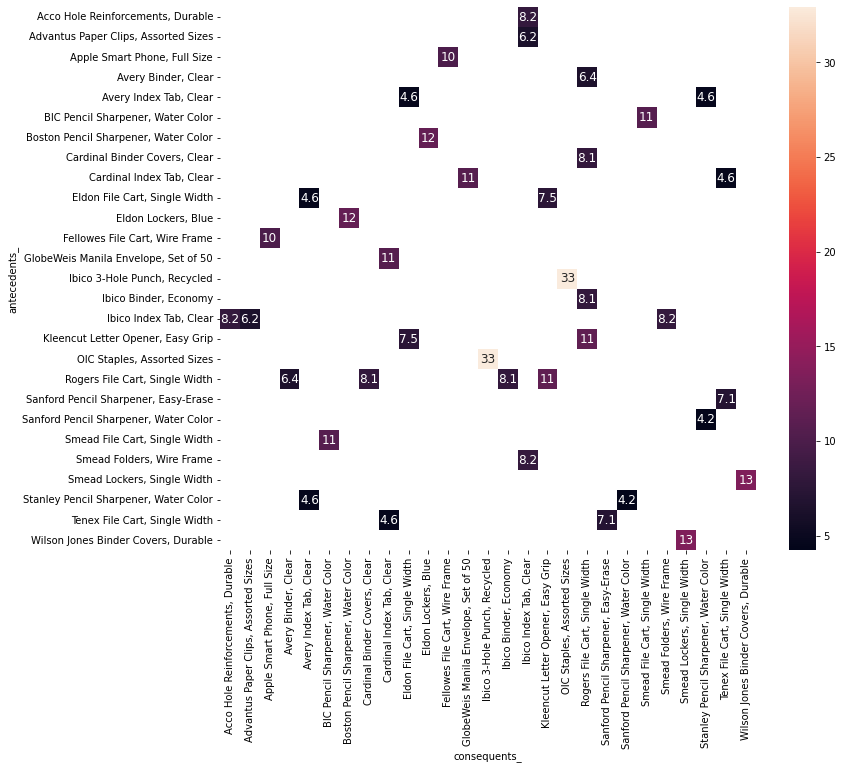

In [62]:
fp_growth_rules_without_staples['lhs items'] = fp_growth_rules_without_staples['antecedents'].apply(lambda x:len(x) )
fp_growth_rules_without_staples[fp_growth_rules_without_staples['lhs items']>0.01].sort_values('lift', ascending=False).head()

# Replace frozen sets with strings
fp_growth_rules_without_staples['antecedents_'] = fp_growth_rules_without_staples['antecedents'].apply(lambda a: ','.join(list(a)))
fp_growth_rules_without_staples['consequents_'] = fp_growth_rules_without_staples['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the lift metric
pivot = fp_growth_rules_without_staples[fp_growth_rules_without_staples['lhs items']>0.01].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')

# Replace frozen sets with strings
fp_growth_rules_without_staples['antecedents_'] = fp_growth_rules_without_staples['antecedents'].apply(lambda a: ','.join(list(a)))
fp_growth_rules_without_staples['consequents_'] = fp_growth_rules_without_staples['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the lift metric
pivot = fp_growth_rules_without_staples[fp_growth_rules_without_staples['lhs items']>0.01].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')

import seaborn as sns
# Generate a heatmap with annotations on and the colorbar off

plt.figure(figsize=(12,10))
sns.heatmap(pivot, annot = True,annot_kws={"fontsize":12})
plt.yticks(rotation=0)
plt.xticks(rotation=90)
#plt.grid(True)
plt.show()

In [63]:
antecedents_ = []
consequents_ = []
values = []
for i in pivot:
    g = pivot.loc[pivot[i].isnull() == False,i]
    df1 = g.to_frame().transpose()
    if len(np.round(g.values, 6))>1:
        for j in g.index:
            antecedents_.append(i)
            consequents_.append(j)
        for l in np.round(g.values, 6):
            values.append(l)
    else:
        antecedents_.append(i)
        consequents_.append(g.index[0])
        values.append(np.round(g.values, 6)[0])

    
    #g.to_csv('itemss.csv',index=False)
    
# iloc[start:stop:step/stride]
#https://stackoverflow.com/questions/63840290/indexing-in-python-dataframe-using-iloc-to-select-all-columns-except-the-first-c
    
# Links:
# https://stackoverflow.com/questions/30787901/how-to-get-a-value-from-a-pandas-dataframe-and-not-the-index-and-object-type
# https://stackoverflow.com/questions/56026858/different-format-of-dataframe-with-loc-and-to-frame

In [64]:
# using the results highlighted in the previous for loop to build-up the dataframe

test_df_fp_growth = pd.DataFrame(columns=['antecedents_', 'consequents_', 'values'])

#identifying the columns
test_df_fp_growth['antecedents_'] = antecedents_
test_df_fp_growth['consequents_'] = consequents_
test_df_fp_growth['values'] = values
test_df_fp_growth['first_recommendation'] = ['Staples' for i in range(len(test_df_fp_growth))] 
#Staples exist to all items!!

#check the final results:
#test_df

In [65]:
temp_fp_growth = test_df_fp_growth[["antecedents_", "consequents_"]]

new_grouping_fp_growth = pd.DataFrame({"antecedents_": temp_fp_growth.antecedents_.unique().tolist(), "consequents_": temp_fp_growth.groupby('antecedents_', as_index=False).apply(lambda x: x['consequents_'].unique())})
new_grouping_fp_growth["first_recommendation"] = ["Staples" for i in range(len(new_grouping_fp_growth))]
#new_grouping

In [66]:
antecedents_products = new_grouping_fp_growth.antecedents_.tolist()
#antecedents_products

In [67]:
new_dataFrame_fp_growth = pd.DataFrame(columns = ["customerId", "antecedents_", "consequents_", "first_recommendation"])

In [68]:
customerIdList = []
antecedents_List = []
consequents_List = []
first_recommendationList = []

for i in range(len(df)):
    if df.ProductName[i] in antecedents_products:
        index = antecedents_products.index(df.ProductName[i])
        customerIdList.append(df.CustomerID[i])
        antecedents_List.append(new_grouping_fp_growth.iloc[index].antecedents_)
        consequents_List.append(new_grouping_fp_growth.iloc[index].consequents_.tolist())
        first_recommendationList.append(new_grouping_fp_growth.iloc[index].first_recommendation)
    else:
        customerIdList.append(df.CustomerID[i])
        antecedents_List.append(df.ProductName[i])
        consequents_List.append("")
        first_recommendationList.append("Staples")

new_dataFrame_fp_growth["customerId"] = customerIdList
new_dataFrame_fp_growth["antecedents_"] = antecedents_List
new_dataFrame_fp_growth["consequents_"] = consequents_List
new_dataFrame_fp_growth["first_recommendation"] = first_recommendationList

In [69]:
#new_dataFrame[new_dataFrame['antecedents_'] == 'Sanford Pencil Sharpener, Easy-Erase']
#new_dataFrame.info()

for i in new_dataFrame_fp_growth:
    new_dataFrame_fp_growth[i] = new_dataFrame_fp_growth[i].astype('string')

#make sure the code is working!
new_dataFrame_fp_growth.info()  
# for col_name, col_type in zip(new_dataFrame.columns, new_dataFrame.dtypes):
#    if col_type == "object":
#        new_dataFrame[i] = new_dataFrame[i].astype('string')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   customerId            51290 non-null  string
 1   antecedents_          51290 non-null  string
 2   consequents_          51290 non-null  string
 3   first_recommendation  51290 non-null  string
dtypes: string(4)
memory usage: 1.6 MB


In [70]:
from sklearn import preprocessing 

label_encoder = preprocessing.LabelEncoder() 
new_dataFrame_fp_growth['consequents_values']= label_encoder.fit_transform(new_dataFrame_fp_growth['consequents_']) 

#new_dataFrame['consequents_values'].value_counts()

In [71]:
df['antecedents_'] = np.where(new_dataFrame_fp_growth['customerId'] == df['CustomerID'],new_dataFrame_fp_growth['antecedents_'],0)
df['consequents_values'] = np.where(new_dataFrame_fp_growth['customerId'] == df['CustomerID'],new_dataFrame_fp_growth['consequents_values'],0)
df['main_recommendation'] = np.where(new_dataFrame_fp_growth['customerId'] == df['CustomerID'],new_dataFrame_fp_growth['first_recommendation'],0)
#df[df['antecedents_'] == 0] # success


In [72]:
X_test = df[df['consequents_values'] == 0]
X_test.drop(['CustomerID','ProductName','antecedents_','main_recommendation','recommendation'],axis=1,inplace=True)
#X_test

/tmp/ipykernel_23358/2824735233.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.drop(['CustomerID','ProductName','antecedents_','main_recommendation','recommendation'],axis=1,inplace=True)


In [73]:
X_train = df.loc[~(df['consequents_values'] == 0)]
X_train.drop(['CustomerID','ProductName','antecedents_','main_recommendation','recommendation'],axis=1,inplace=True)
#X_train

/tmp/ipykernel_23358/658688997.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(['CustomerID','ProductName','antecedents_','main_recommendation','recommendation'],axis=1,inplace=True)


In [74]:
y_train = X_train['consequents_values']

In [75]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=23)
  
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=23)

In [76]:
# Generate the prediction values
y_predict = knn.predict(X_test)

print(y_predict)

[ 1  1  1 ...  1 10  8]


In [77]:
X_test["consequents_values"] = X_test.loc[X_test["consequents_values"] == 0, "consequents_values"] = y_predict
#X_test

/tmp/ipykernel_23358/949350580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["consequents_values"] = X_test.loc[X_test["consequents_values"] == 0, "consequents_values"] = y_predict


In [78]:
new_dataFrame_fp_growth.consequents_values = new_dataFrame_fp_growth.consequents_values.astype(int)

In [79]:
df0 = pd.concat([X_train, X_test], axis=0, ignore_index=True)

In [80]:
# add the updated column:
df['consequents_values'] = np.where(((df0['Profit'] == df['Profit']) & (df0['ShippingCost'] == df['ShippingCost']) & (df0['OrderPriority'] == df['OrderPriority'])),df0['consequents_values'],df0['consequents_values'])

In [81]:
new_dataFrame_fp_growth.consequents_values = df.consequents_values

In [82]:
# create dummy dataframe just to transition the variables correctly to the original dataframe "df"
data = pd.DataFrame(columns=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18',
                            '19','20','21','22','23'])

In [83]:
data['18']=np.where(new_dataFrame_fp_growth['consequents_values'] == 18,new_dataFrame_fp_growth['consequents_'].value_counts().index[1],"")
data['16']=np.where(new_dataFrame_fp_growth['consequents_values'] == 16,new_dataFrame_fp_growth['consequents_'].value_counts().index[2],"")
data['14']=np.where(new_dataFrame_fp_growth['consequents_values'] == 14,new_dataFrame_fp_growth['consequents_'].value_counts().index[3],"")
data['4']=np.where(new_dataFrame_fp_growth['consequents_values'] == 4,new_dataFrame_fp_growth['consequents_'].value_counts().index[4],"")
data['3']=np.where(new_dataFrame_fp_growth['consequents_values'] == 3,new_dataFrame_fp_growth['consequents_'].value_counts().index[5],"")
data['1']=np.where(new_dataFrame_fp_growth['consequents_values'] == 1,new_dataFrame_fp_growth['consequents_'].value_counts().index[6],"")
data['21']=np.where(new_dataFrame_fp_growth['consequents_values'] == 21,new_dataFrame_fp_growth['consequents_'].value_counts().index[7],"")
data['6']=np.where(new_dataFrame_fp_growth['consequents_values'] == 6,new_dataFrame_fp_growth['consequents_'].value_counts().index[8],"")
data['5']=np.where(new_dataFrame_fp_growth['consequents_values'] == 5,new_dataFrame_fp_growth['consequents_'].value_counts().index[9],"")
data['11']=np.where(new_dataFrame_fp_growth['consequents_values'] == 11,new_dataFrame_fp_growth['consequents_'].value_counts().index[10],"")
data['8']=np.where(new_dataFrame_fp_growth['consequents_values'] == 8,new_dataFrame_fp_growth['consequents_'].value_counts().index[11],"")
data['12']=np.where(new_dataFrame_fp_growth['consequents_values'] == 12,new_dataFrame_fp_growth['consequents_'].value_counts().index[12],"")
data['13']=np.where(new_dataFrame_fp_growth['consequents_values'] == 13,new_dataFrame_fp_growth['consequents_'].value_counts().index[13],"")
data['2']=np.where(new_dataFrame_fp_growth['consequents_values'] == 2,new_dataFrame_fp_growth['consequents_'].value_counts().index[14],"")
data['22']=np.where(new_dataFrame_fp_growth['consequents_values'] == 22,new_dataFrame_fp_growth['consequents_'].value_counts().index[15],"")
data['20']=np.where(new_dataFrame_fp_growth['consequents_values'] == 20,new_dataFrame_fp_growth['consequents_'].value_counts().index[16],"")
data['23']=np.where(new_dataFrame_fp_growth['consequents_values'] == 23,new_dataFrame_fp_growth['consequents_'].value_counts().index[17],"")
data['17']=np.where(new_dataFrame_fp_growth['consequents_values'] == 17,new_dataFrame_fp_growth['consequents_'].value_counts().index[18],"")
data['19']=np.where(new_dataFrame_fp_growth['consequents_values'] == 19,new_dataFrame_fp_growth['consequents_'].value_counts().index[19],"")
data['10']=np.where(new_dataFrame_fp_growth['consequents_values'] == 10,new_dataFrame_fp_growth['consequents_'].value_counts().index[20],"")
data['7']=np.where(new_dataFrame_fp_growth['consequents_values'] == 7,new_dataFrame_fp_growth['consequents_'].value_counts().index[21],"")
data['9']=np.where(new_dataFrame_fp_growth['consequents_values'] == 9,new_dataFrame_fp_growth['consequents_'].value_counts().index[22],"")
data['15']=np.where(new_dataFrame_fp_growth['consequents_values'] == 15,new_dataFrame_fp_growth['consequents_'].value_counts().index[23],"")

In [84]:
data1 = data[data.columns[0:]].apply(
    lambda x: ''.join(x.dropna().astype(str)),
    axis=1)

In [85]:
data1 = pd.DataFrame(data1)

In [86]:
newdata = data1.rename(columns={0: 'recommendation'}) 

In [87]:
newdata = newdata.astype('string')

In [88]:
df['recommendation'] = newdata['recommendation']

In [89]:
df.drop(['antecedents_','consequents_values'],axis=1,inplace=True)

In [90]:
df[['CustomerID','main_recommendation', 'recommendation']]

,CustomerID,main_recommendation,recommendation
0,LS172304,Staples,"['Apple Smart Phone, Full Size']"
1,MV174854,Staples,"['OIC Staples, Assorted Sizes']"
2,CS121304,Staples,"['Apple Smart Phone, Full Size']"
3,CS121304,Staples,"['Avery Index Tab, Clear', 'Sanford Pencil Sha..."
4,AP109154,Staples,"['Eldon Lockers, Blue']"
...,...,...,...
51285,AM103604,Staples,"['Acco Hole Reinforcements, Durable', 'Advantu..."
51286,AM103604,Staples,"['Acco Hole Reinforcements, Durable', 'Advantu..."
51287,HR147704,Staples,"['Acco Hole Reinforcements, Durable', 'Advantu..."
51288,RM196754,Staples,"['Eldon File Cart, Single Width', 'Rogers File..."


In [91]:
FpGrowth_recs = df

In [92]:
FpGrowth_recs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              51290 non-null  string 
 1   Discount                51290 non-null  float64
 2   OrderPriority           51290 non-null  int64  
 3   ProductName             51290 non-null  string 
 4   Profit                  51290 non-null  float64
 5   Sales                   51290 non-null  int64  
 6   Segment                 51290 non-null  int64  
 7   ShipMode                51290 non-null  int64  
 8   ShippingCost            51290 non-null  float64
 9   Year                    51290 non-null  int64  
 10  DaysofOrderPreparation  51290 non-null  int64  
 11  Rating                  51290 non-null  int64  
 12  Market_APAC             51290 non-null  bool   
 13  Market_Africa           51290 non-null  bool   
 14  Market_Canada           51290 non-null

********


<h6 style="background-color:#f9f1fe; color:#000; font-size:18px; padding:20px; text-align:center; border-radius:15px; font-family:'Verdana', sans-serif;"> Naive Bayes </h6>
    

In [93]:
df = original_df

In [94]:
# Separate user characteristics, product details, and ratings
user_features = df.drop(['CustomerID','ProductName','Rating'], axis=1)
product_details = df["ProductName"]
ratings = df["Rating"]

In [95]:
group = df.groupby('CustomerID')

df2 = group.apply(lambda x: x['Rating'].unique().tolist())
df2.values.tolist()

[[2, 3, 1, 5, 9, 4],
 [2, 1, 5, 4, 3],
 [4, 2],
 [2, 1, 5],
 [1, 6, 4, 3, 2],
 [4, 2, 6, 3],
 [2, 4, 1, 6],
 [2, 4, 1],
 [4, 2, 3],
 [1, 4, 6, 5, 2, 3],
 [4, 2, 5, 6],
 [1, 2, 6, 3],
 [5, 2, 1, 4, 3],
 [2, 3, 1, 7, 5, 4],
 [4, 2, 5, 3],
 [2, 3, 4],
 [1],
 [2, 4, 1],
 [2, 6, 1, 3],
 [3],
 [1, 2],
 [2, 1],
 [2],
 [4, 2, 1],
 [1, 3, 2, 4],
 [1],
 [3, 1, 2, 4, 6, 9, 5],
 [2, 5, 4, 1, 6, 3],
 [7, 2, 4, 1],
 [2, 1],
 [2, 1, 6, 7, 3],
 [3, 4, 7, 2],
 [2, 4, 5, 7, 10, 3, 6],
 [2, 3, 1, 7, 5],
 [1, 3, 2, 4, 5],
 [2, 6, 1, 4, 3],
 [2, 3, 5, 4],
 [2, 1, 9, 4, 7, 3],
 [2, 4, 1],
 [3, 4, 2, 5, 6],
 [4, 2, 5, 3, 1],
 [2, 3, 4, 1],
 [4, 6, 2, 3, 1],
 [2, 4, 3, 1, 5, 6, 7],
 [1, 6, 4, 2],
 [4, 2, 1, 3],
 [6, 2, 7, 1, 4, 8, 3],
 [2, 3, 1],
 [2, 3, 4, 1],
 [4, 2, 3, 1],
 [1, 2],
 [2],
 [1, 6, 2, 3],
 [4, 3, 1, 2, 5],
 [2, 7, 5, 4, 3],
 [2, 5],
 [2, 4, 10, 3],
 [1, 2, 10, 3],
 [1, 3],
 [1, 2, 6],
 [1],
 [6],
 [1, 2],
 [3, 1, 2],
 [1, 2],
 [2],
 [6, 9, 1, 2, 3],
 [1, 2, 3],
 [6, 3, 2],
 [1, 2, 4],
 [3, 2,

In [96]:
interaction_matrix = df.pivot_table(index='CustomerID',columns='ProductName',values='Rating').fillna(0)

# Train-test split (optional, but recommended for evaluation)
user_features_train, user_features_test, ratings_train, ratings_test = train_test_split(
    interaction_matrix, df2.values.tolist(), test_size=0.3, random_state=42)

In [97]:
# Standardize user characteristics (optional, but may improve performance)
# scaler = StandardScaler()
# user_features_train_scaled = scaler.fit_transform(user_features_train)
# user_features_test_scaled = scaler.transform(user_features_test)

In [98]:
# Apply SVD to user-item rating matrix
# user_item_matrix = ratings_train.T # Transpose for user-based filtering
# user_item_matrix = user_item_matrix.values.reshape(1,-1)
svd = TruncatedSVD(n_components=17, n_iter=7, random_state=42)  # Choose appropriate dimensionality
user_features = svd.fit_transform(interaction_matrix)

In [99]:
user_features_df = pd.DataFrame(user_features, index=interaction_matrix.index, columns=[f'feature_{i+1}' for i in range(17)])
user_features_df.head(3)

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17
CustomerID,,,,,,,,,,,,,,,,,
AA103151,0.692926,-0.000022,-0.338292,0.069067,-0.502625,-0.200125,0.267181,-0.336755,0.168845,-0.183712,-0.020523,0.091581,0.010762,-0.160560,-0.296429,0.222914,-0.036758
AA103152,0.939267,0.000118,0.031017,0.124008,0.047527,-0.055555,0.062859,-0.483629,-0.459342,0.387227,0.163724,-0.728389,-0.446991,-0.265246,0.072002,0.332582,-0.184669
AA103153,0.506630,0.000004,0.011538,-0.220289,0.132352,0.047481,0.073318,-0.065315,-0.090543,0.018356,0.097547,0.223695,0.107289,-0.277160,-0.076829,0.149876,0.123253


In [100]:
kmeans = KMeans(n_clusters=17, random_state=42)
kmeans

KMeans(n_clusters=17, random_state=42)

In [101]:
user_clusters = kmeans.fit_predict(user_features_df)
user_clusters

/home/rewan/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 0, ..., 9, 0, 0], dtype=int32)

In [102]:
user_features_df['cluster'] = user_clusters
user_features_df.head(3)

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,cluster
CustomerID,,,,,,,,,,,,,,,,,,
AA103151,0.692926,-0.000022,-0.338292,0.069067,-0.502625,-0.200125,0.267181,-0.336755,0.168845,-0.183712,-0.020523,0.091581,0.010762,-0.160560,-0.296429,0.222914,-0.036758,1
AA103152,0.939267,0.000118,0.031017,0.124008,0.047527,-0.055555,0.062859,-0.483629,-0.459342,0.387227,0.163724,-0.728389,-0.446991,-0.265246,0.072002,0.332582,-0.184669,1
AA103153,0.506630,0.000004,0.011538,-0.220289,0.132352,0.047481,0.073318,-0.065315,-0.090543,0.018356,0.097547,0.223695,0.107289,-0.277160,-0.076829,0.149876,0.123253,0


In [103]:
user_encoder = LabelEncoder()
item_encoder = LabelEncoder()

In [104]:
df['CustomerID_enc'] = user_encoder.fit_transform(df['CustomerID'])
df['ProductName_enc'] = item_encoder.fit_transform(df['ProductName'])

In [ ]:
cluster_models = {}

# Train a Naive Bayes model for each cluster
for cluster in range(17):
    cluster_users = user_features_df[user_features_df['cluster'] == cluster].index
    cluster_data = df[df['CustomerID'].isin(cluster_users)]
    
    X = cluster_data[['CustomerID_enc', 'ProductName_enc']]
    y = cluster_data['Rating']
    
    model = MultinomialNB()
    model.fit(X, y)
    cluster_models[cluster] = model
cluster_models

In [ ]:
unique_users = df['CustomerID'].unique()
unique_items = df['ProductName'].unique()

In [ ]:
# Create a DataFrame to store recommendations
recommendations_list = []

# Predict probabilities for all user-item pairs
all_user_item_pairs = pd.DataFrame([(user, item) for user in unique_users for item in unique_items], columns=['CustomerID', 'ProductName'])
all_user_item_pairs['CustomerID_enc'] = user_encoder.transform(all_user_item_pairs['CustomerID'])
all_user_item_pairs['ProductName_enc'] = item_encoder.transform(all_user_item_pairs['ProductName'])

In [ ]:
# Set a threshold for interaction probability
threshold = 0.50

# Generate recommendations for each user based on their cluster
for user in unique_users:
    cluster = user_features_df.loc[user, 'cluster']
    model = cluster_models[cluster]
    
    
    user_data = all_user_item_pairs[all_user_item_pairs['CustomerID'] == user]
    user_data['interaction_proba'] = model.predict_proba(user_data[['CustomerID_enc', 'ProductName_enc']])[:, 1]
    
    # Apply threshold
    recommended_items = user_data[user_data['interaction_proba'] >= threshold]['ProductName'].tolist()#[:3] forget it!!
    recommendations_list.append({'CustomerID': user, 'recommended_items': recommended_items})



In [ ]:
recommendations_df = pd.DataFrame(recommendations_list)

In [ ]:
recommendations_df.to_csv("recommendations_df.csv",index=False)

In [106]:
#
import pandas as pd
import numpy as np
import ast
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#
df = pd.read_csv("recommendations_df.csv")

In [107]:
#convert the new datafrem columns to strings
for col in df:
    df[col] = df[col].astype("string")

In [108]:
# Function to parse the string representation of lists and concatenate the first three items
def get_first_three_items_concatenated(items):
    # Convert string representation of list to an actual list
    items_list = ast.literal_eval(items)
    # Return the first three items concatenated as a string
    return ', '.join(items_list[:3])

# Applying the function to the 'recommended_items' column
df['first_three_items'] = df['recommended_items'].apply(get_first_three_items_concatenated)

# Display the DataFrame
print(df[['CustomerID', 'first_three_items']].head(5))

  CustomerID                                  first_three_items
0   LS172304  Personal Creations Ink Jet Cards and Labels, P...
1   MV174854  Panasonic KP-4ABK Battery-Operated Pencil Shar...
2   CS121304  Cameo Buff Policy Envelopes, Cardinal Holdit D...
3   AP109154  American Pencil, Advantus T-Pin Paper Clips, A...
4   JF154904  Hammermill Color Copier Paper (28Lb. and 96 Br...


In [109]:
temp_fti = []
orig_custs = original_df.CustomerID.tolist()
df_custs = df.CustomerID.tolist()
for i in orig_custs:
    temp_fti.append(df.first_three_items[df_custs.index(i)])
original_df['first_three_items'] = temp_fti

In [110]:
original_df.head(5)

,CustomerID,Discount,OrderPriority,ProductName,Profit,Sales,Segment,ShipMode,ShippingCost,Year,...,Market_Canada,Market_EMEA,Market_EU,Market_LATAM,Market_US,main_recommendation,recommendation,CustomerID_enc,ProductName_enc,first_three_items
0,LS172304,0.0,2,Xerox 225,9.3312,19,0,2,4.37,2011,...,False,False,False,False,True,Staples,"['Apple Smart Phone, Full Size']",2909,3736,"Personal Creations Ink Jet Cards and Labels, P..."
1,MV174854,0.0,3,"Wirebound Service Call Books, 5 1/2"" x 4""",9.2928,19,0,0,0.94,2011,...,False,False,False,False,True,Staples,"['OIC Staples, Assorted Sizes']",3341,3569,Panasonic KP-4ABK Battery-Operated Pencil Shar...
2,CS121304,0.0,3,"Adams Phone Message Book, Professional, 400 Me...",9.8418,21,0,0,1.81,2011,...,False,False,False,False,True,Staples,"['Apple Smart Phone, Full Size']",1057,175,"Cameo Buff Policy Envelopes, Cardinal Holdit D..."
3,CS121304,0.0,3,Xerox 1913,53.2608,111,0,0,4.59,2011,...,False,False,False,False,True,Staples,"['Avery Index Tab, Clear', 'Sanford Pencil Sha...",1057,3612,"Cameo Buff Policy Envelopes, Cardinal Holdit D..."
4,AP109154,0.0,2,Xerox 223,3.1104,6,0,0,1.32,2011,...,False,False,False,False,True,Staples,"['Eldon Lockers, Blue']",277,3734,"American Pencil, Advantus T-Pin Paper Clips, A..."


********

<h6 style="background-color:#f9f1fe; color:#000; font-size:18px; padding:20px; text-align:center; border-radius:15px; font-family:'Verdana', sans-serif;"> Comparing the Performance Between Apriori - FP-Growth - Naive Bayes Models </h6>
    

In [112]:
# Load the dataset
data = original_df

# Preprocess the data
# We'll create a user-item matrix for Apriori and FP-Growth
user_item_matrix = data.pivot_table(index='CustomerID', columns='ProductName', values='Rating')
user_item_matrix = user_item_matrix.applymap(lambda x: 1 if x > 0 else 0).fillna(0)

# Data preparation for Naive Bayes (content-based filtering)
# We'll use product categories as features
X = pd.get_dummies(data['ProductName'])
y = (data['Rating'] > data['Rating'].mean()).astype(int)

# Split the data for Naive Bayes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [113]:

# Step 4: Apply Naive Bayes Algorithm
start_time = time.time()
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, y_pred)
naive_bayes_time = time.time() - start_time


In [114]:

# Step 2: Apply Apriori Algorithm
start_time = time.time()
frequent_itemsets_apriori = apriori(user_item_matrix, min_support=0.001,use_colnames=True,low_memory=True)
rules_apriori = association_rules(frequent_itemsets_apriori, metric="lift")
apriori_time = time.time() - start_time

# Step 3: Apply FP-Growth Algorithm
start_time = time.time()
frequent_itemsets_fpgrowth = fpgrowth(user_item_matrix, min_support=0.001,use_colnames=True)
rules_fpgrowth = association_rules(frequent_itemsets_fpgrowth, metric="lift") #, min_threshold=0.3
fpgrowth_time = time.time() - start_time


In [115]:

# Print results
print("Apriori Results:")
print(f"Time taken: {apriori_time:.2f} seconds")
print(f"Number of rules: {len(rules_apriori)}")

print("\nFP-Growth Results:")
print(f"Time taken: {fpgrowth_time:.2f} seconds")
print(f"Number of rules: {len(rules_fpgrowth)}")


print("\nNaive Bayes Results:")
print(f"Time taken: {naive_bayes_time:.2f} seconds")
print(f"Accuracy: {nb_accuracy:.2f}")


Apriori Results:
Time taken: 2.99 seconds
Number of rules: 124

FP-Growth Results:
Time taken: 0.70 seconds
Number of rules: 124

Naive Bayes Results:
Time taken: 8.09 seconds
Accuracy: 0.58


| Evaluation Metrics | Apriori | FP-Growth | Naive Bayes |
| :- | :- | :- | :- |
| Time Taken | 2.99 seconds | 0.70 seconds | 8.09 seconds |
| Number of Rules | 124 | 124 | -- |
| Accuracy | -- | -- | 62% |
| Support |  0.1% | 0.1% | -- |

********

<h6 style="background-color:#f9f1fe; color:#000; font-size:18px; padding:20px; text-align:center; border-radius:15px; font-family:'Verdana', sans-serif;"> AB Testing </h6>
    